# Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.style.use("fivethirtyeight")

In [38]:
df = pd.read_csv("indian_liver_patient.csv")

In [39]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [40]:
df.shape

(583, 11)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [42]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# EDA (Exploratory Data Analysis)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [44]:
df["Dataset"].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [45]:
df['Dataset'].unique()

array([1, 2])

In [46]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

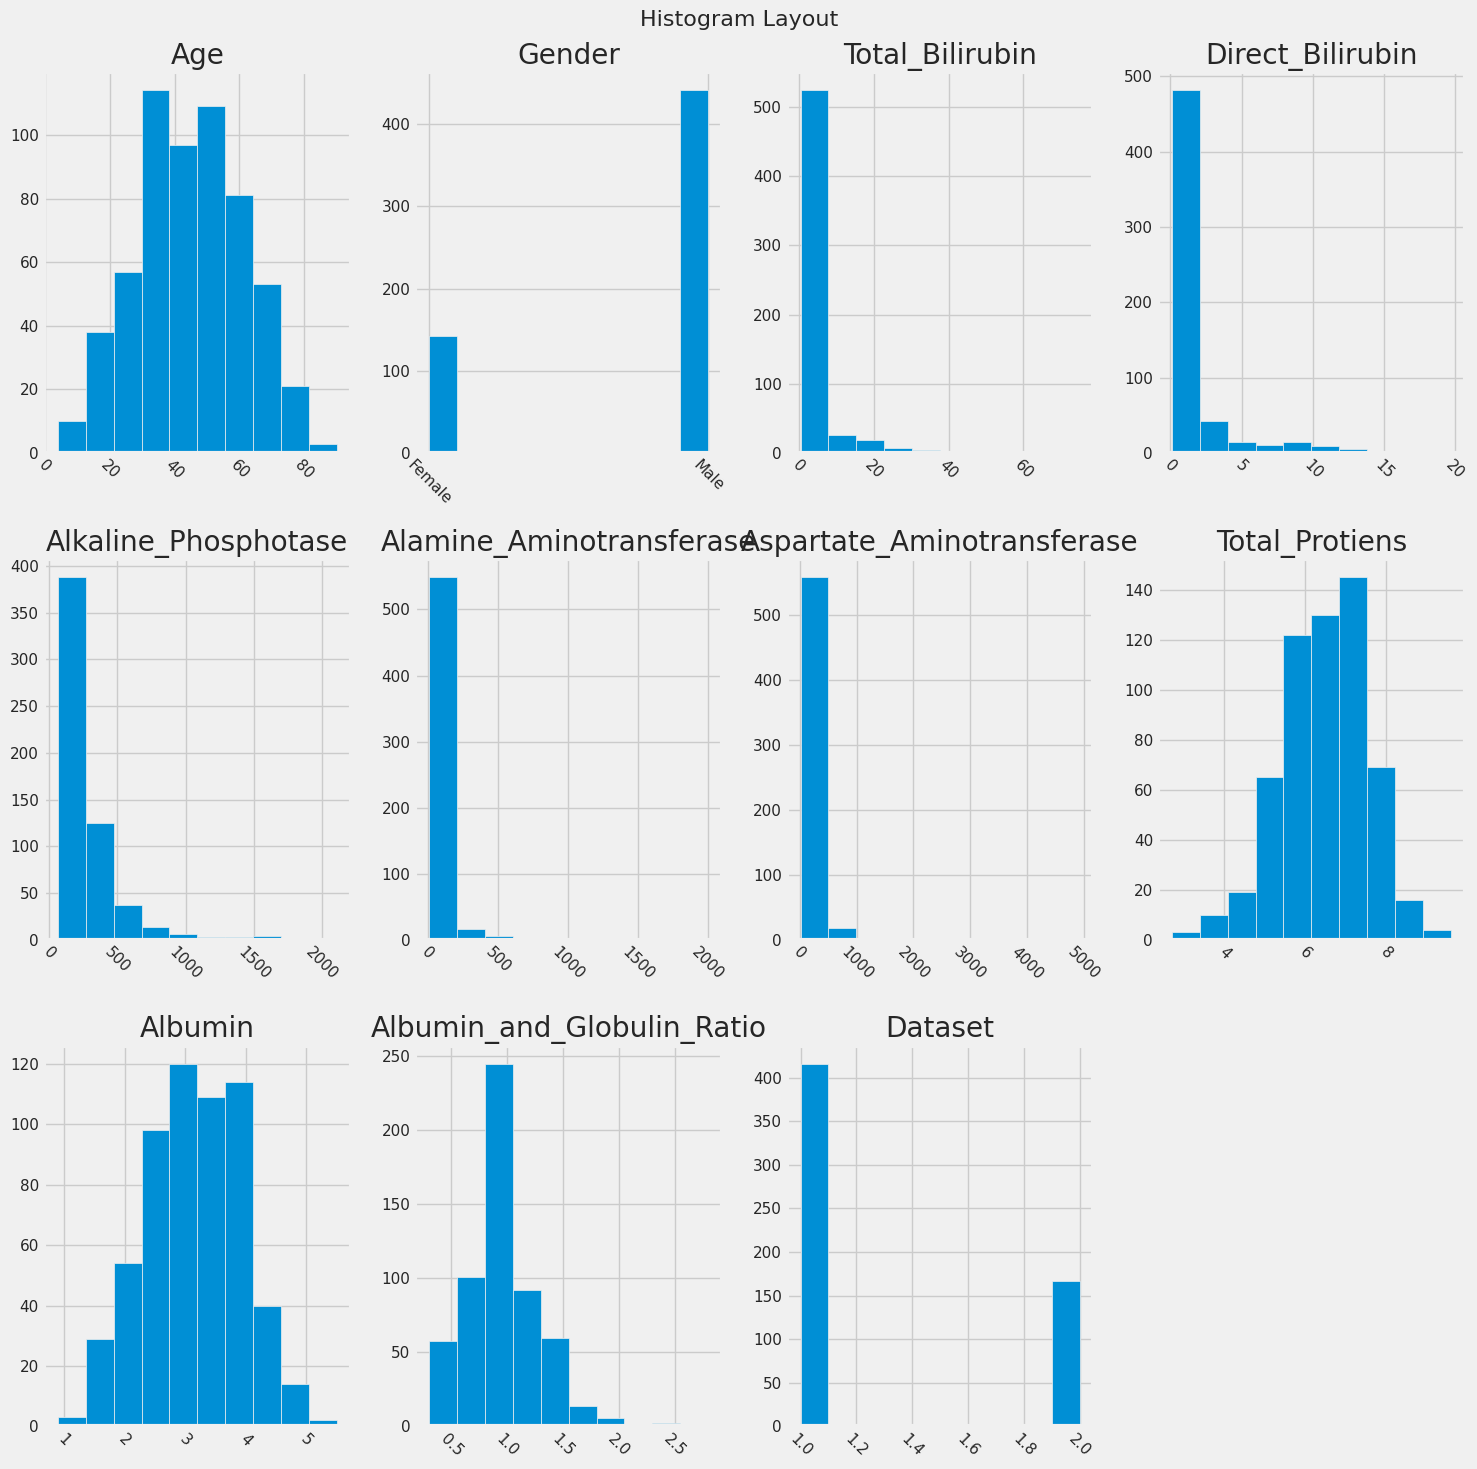

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
fig.suptitle('Histogram Layout', fontsize=16)

# Flatten the axes array to make iteration easier
axes_flat = axes.flatten()

# Iterate through columns and plot histograms
for i, column in enumerate(df.columns):
    if i < 11:  # Limit to 11 columns
        df[column].hist(ax=axes_flat[i], bins=10)
        axes_flat[i].set_title(column)
        axes_flat[i].tick_params(axis='x', rotation=-45)

# Hide the last subplot
axes_flat[11].axis('off')

plt.tight_layout()
plt.show()

In [48]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [49]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Dataset'] = df['Dataset'].map(convertdataset)

In [50]:
df["Dataset"]

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

In [51]:
df["Dataset"].value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

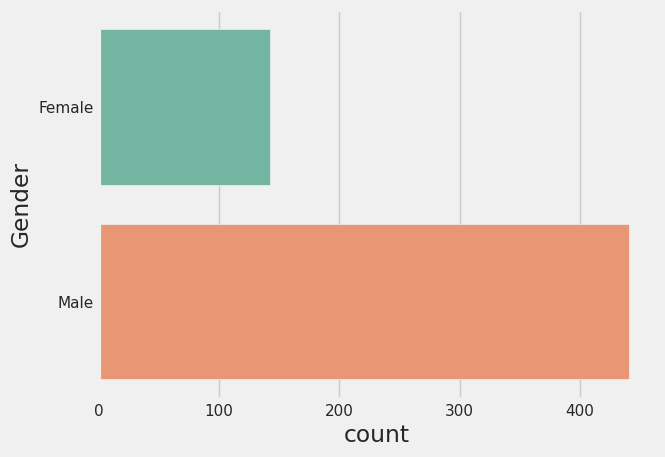

In [52]:
sns.countplot(y='Gender', data=df, palette='Set2')

In [53]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [54]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [55]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Correlations & Heatmap

In [56]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


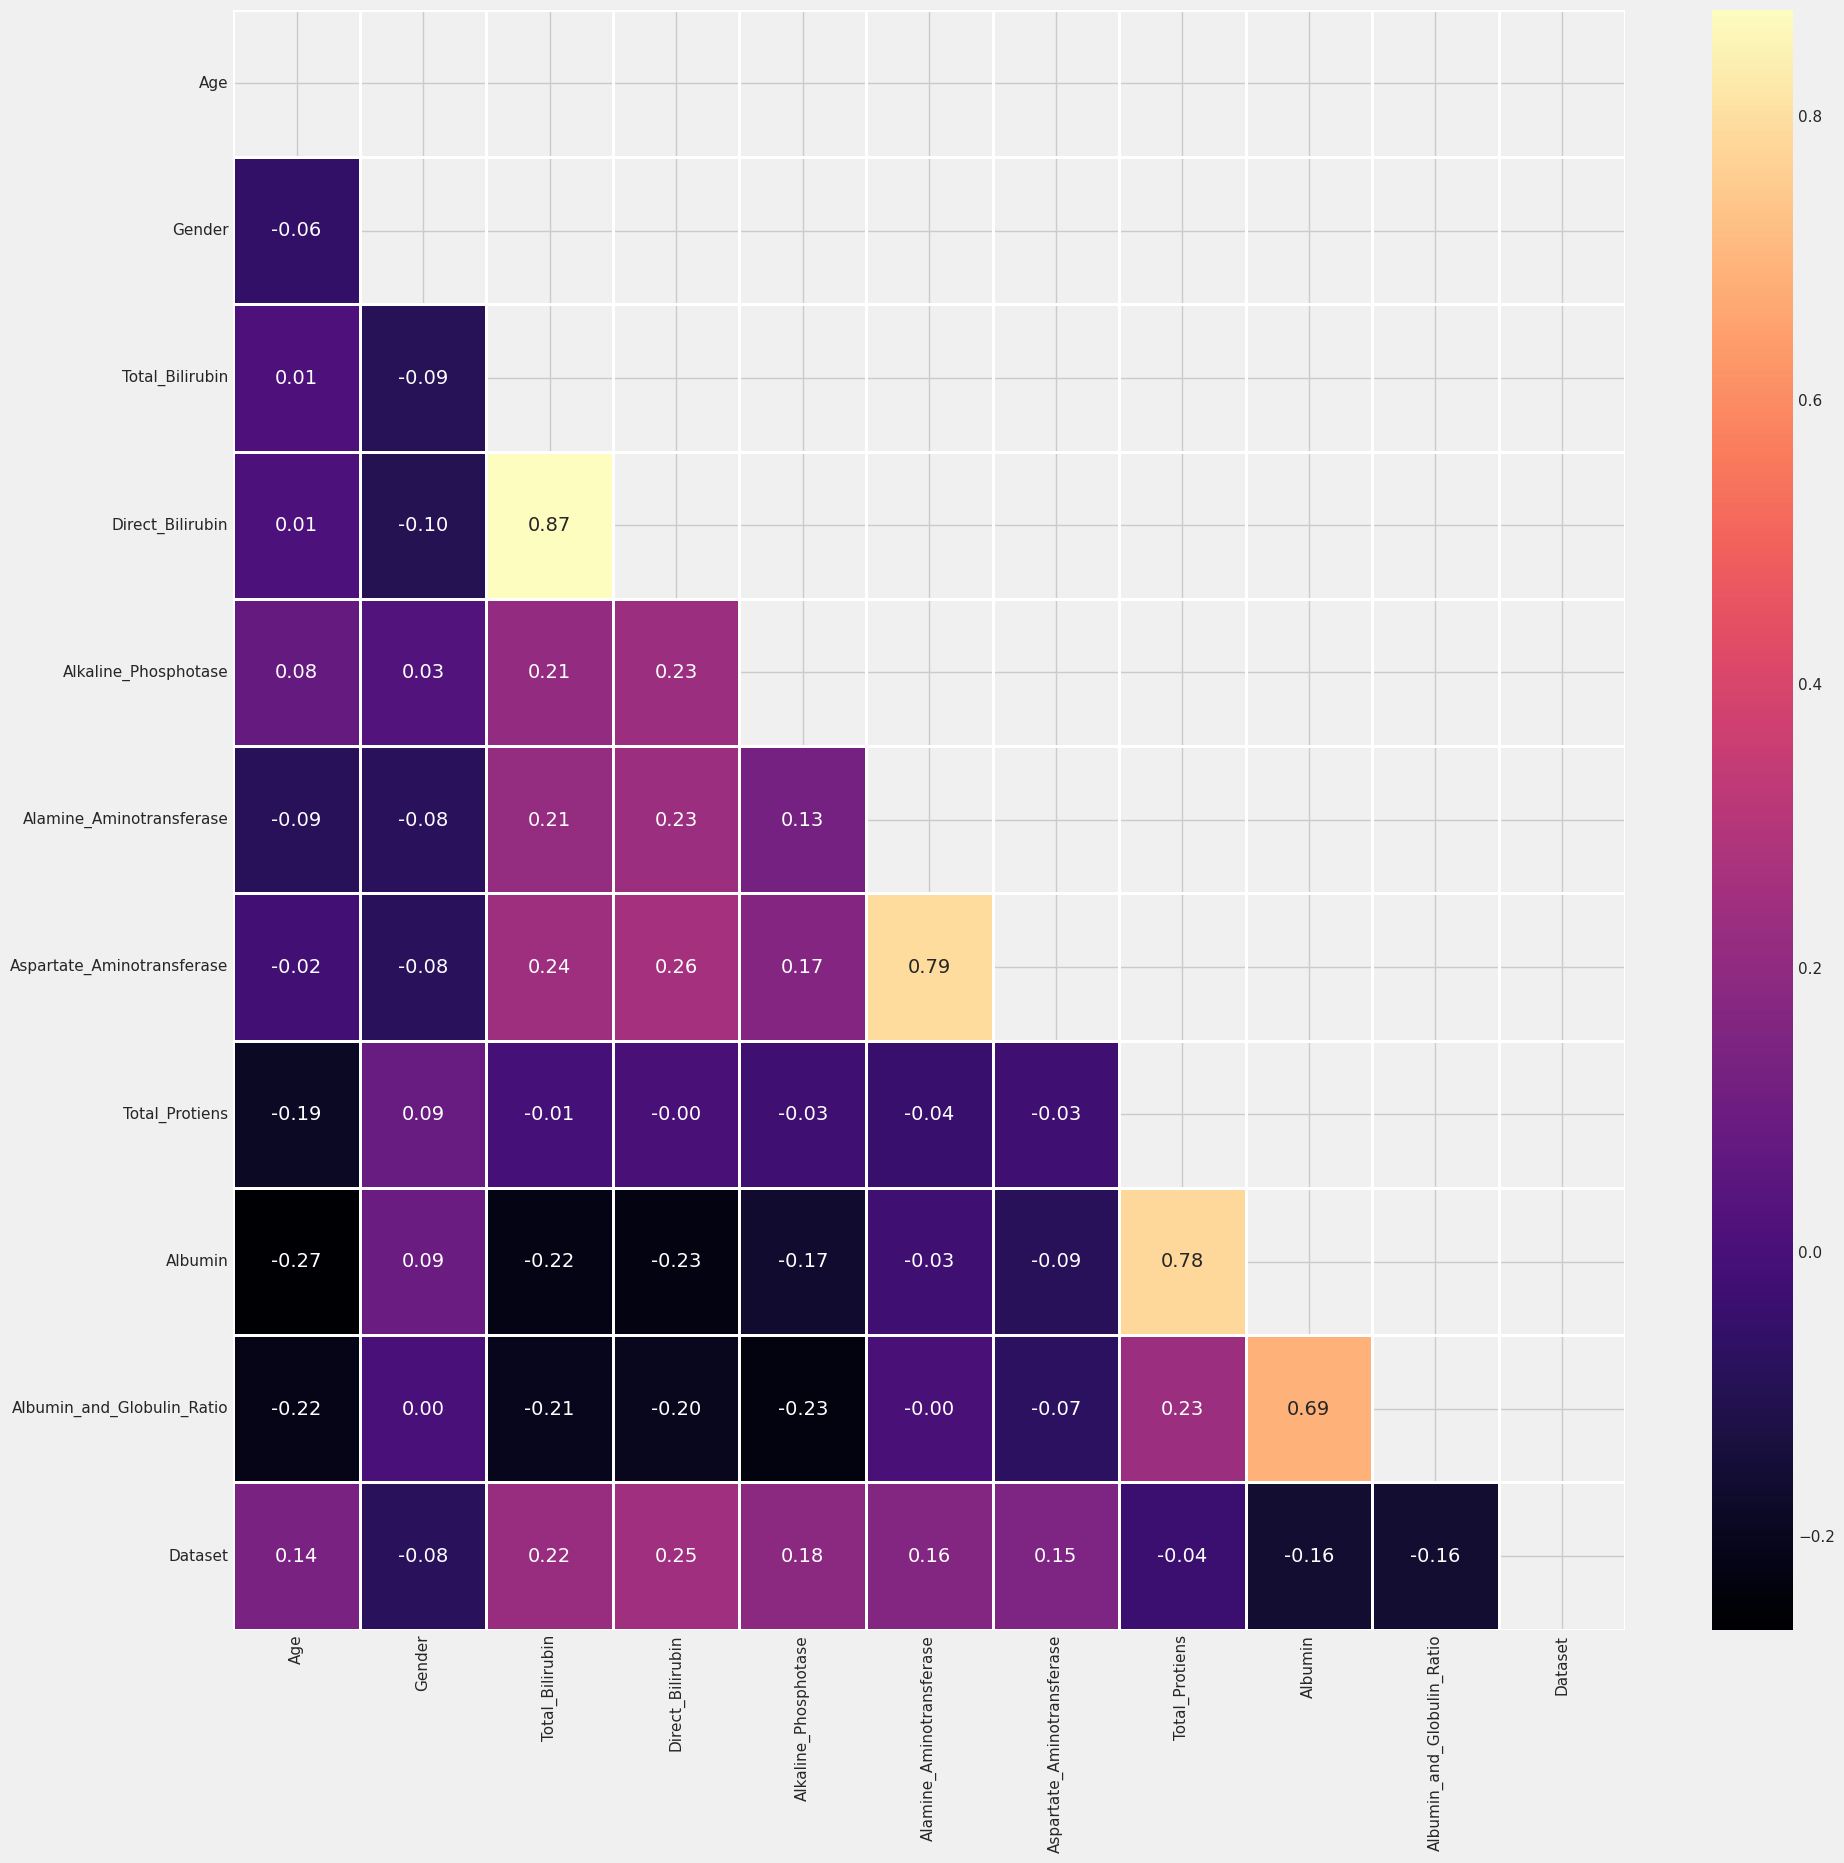

In [57]:
plt.figure(figsize=(20,20))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap="magma")
plt.show()

In [58]:
df = df.drop_duplicates()

In [59]:
df.shape

(570, 11)

# Outlier Detection - Box Plots

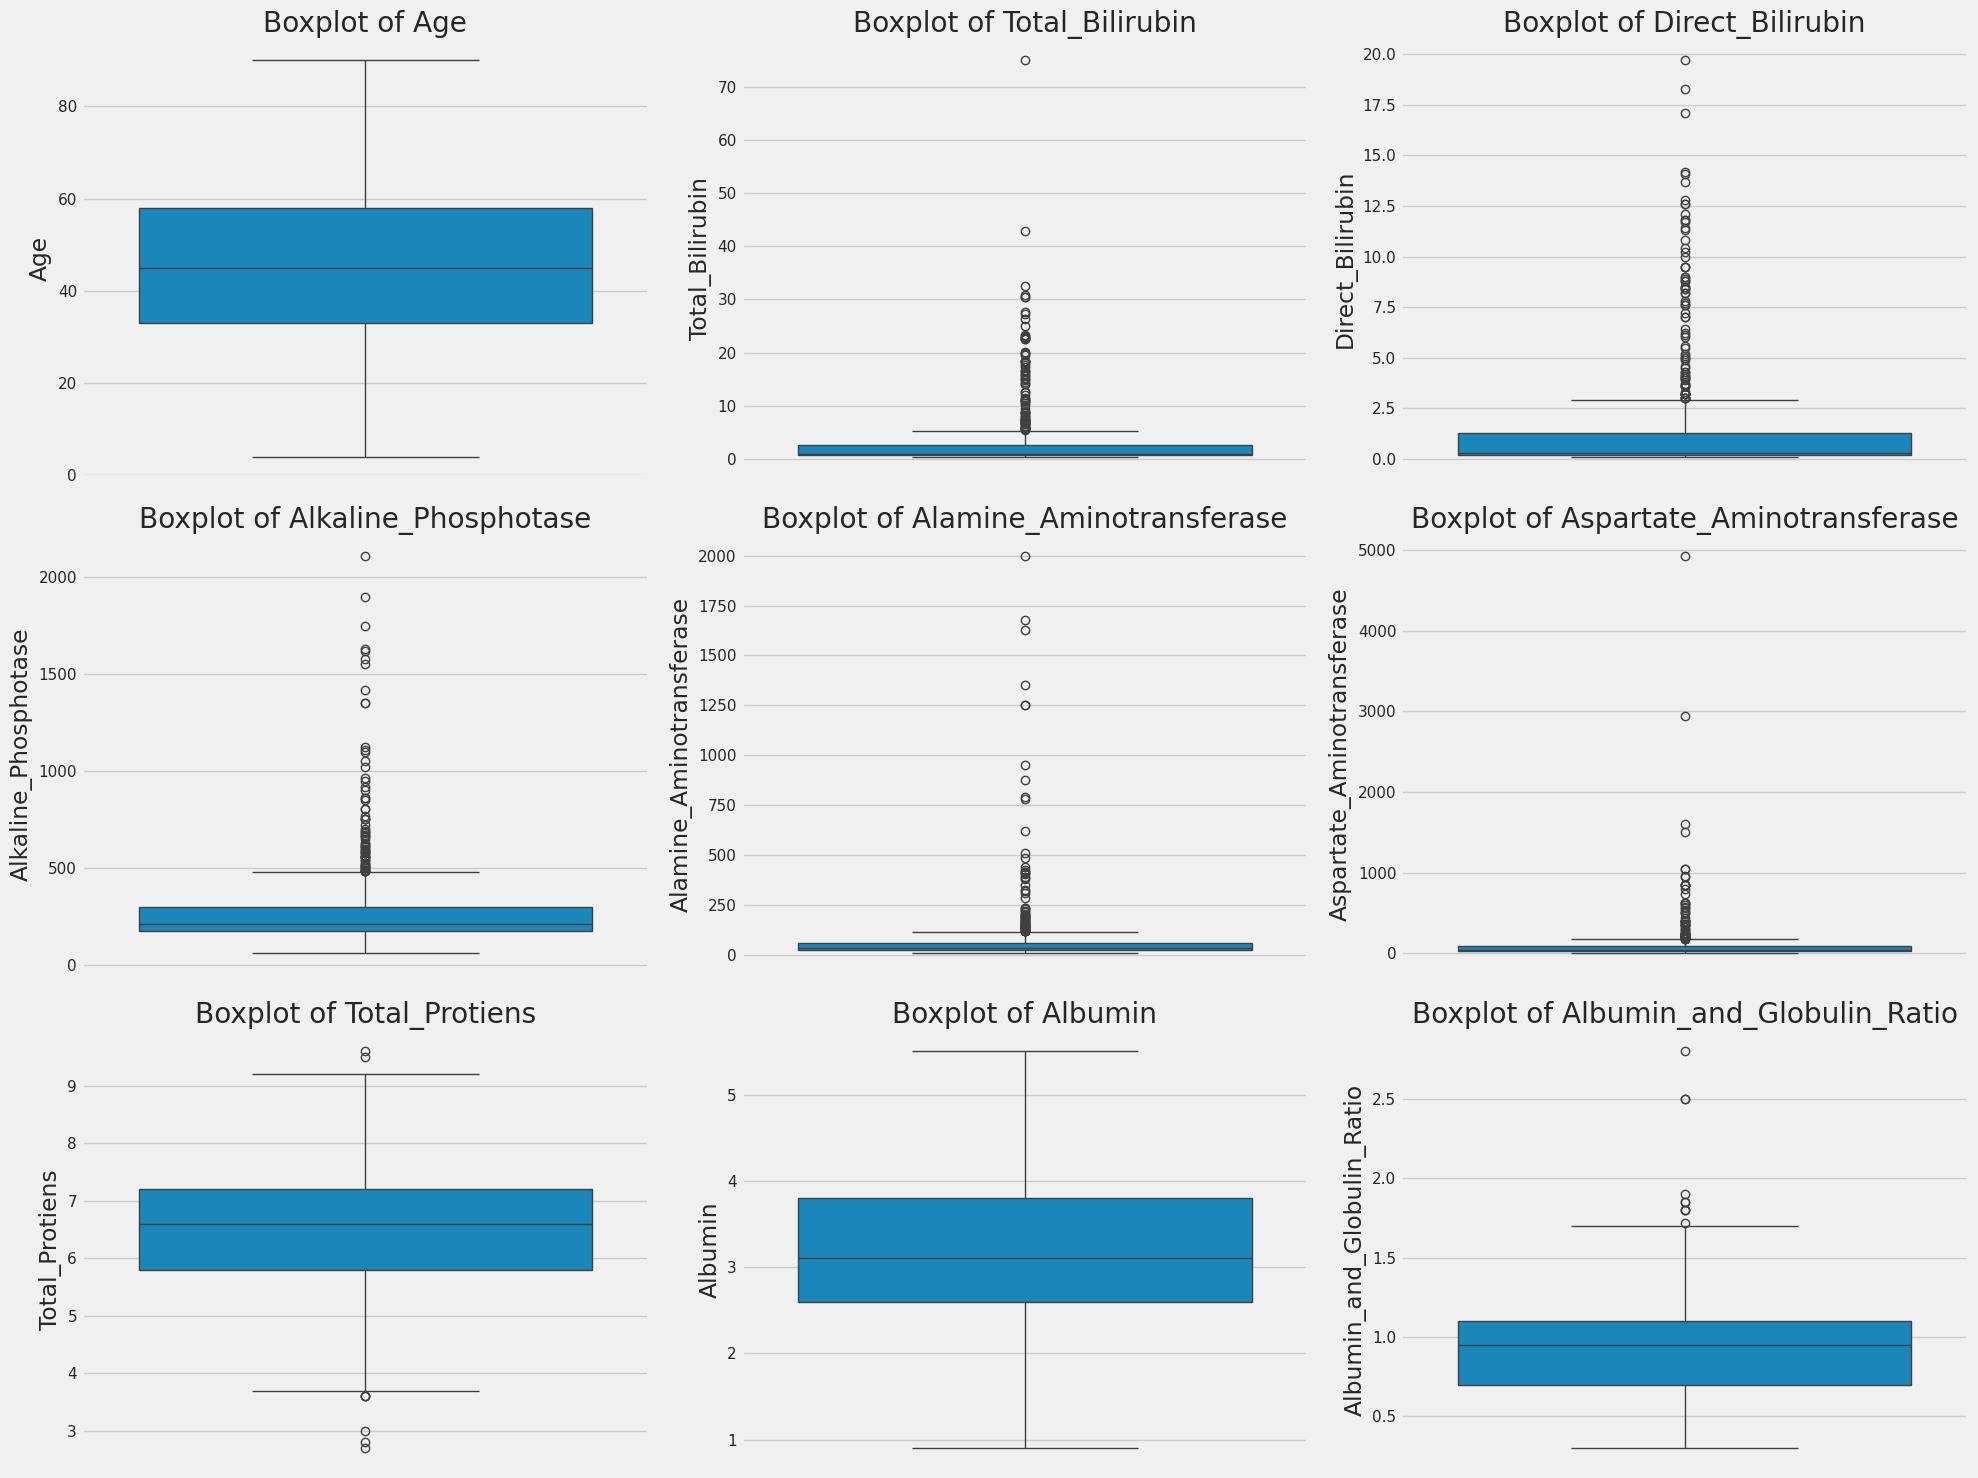

In [60]:
columns = [col for col in df.columns if col not in ['Dataset', 'Gender']]
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Changed to 3x3 grid
    sns.boxplot(y=column, data=df)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

In [61]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [62]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [63]:
df.shape

(569, 11)

In [64]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [65]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [66]:
df.shape

(568, 11)

# Handling Missing Values

<Axes: >

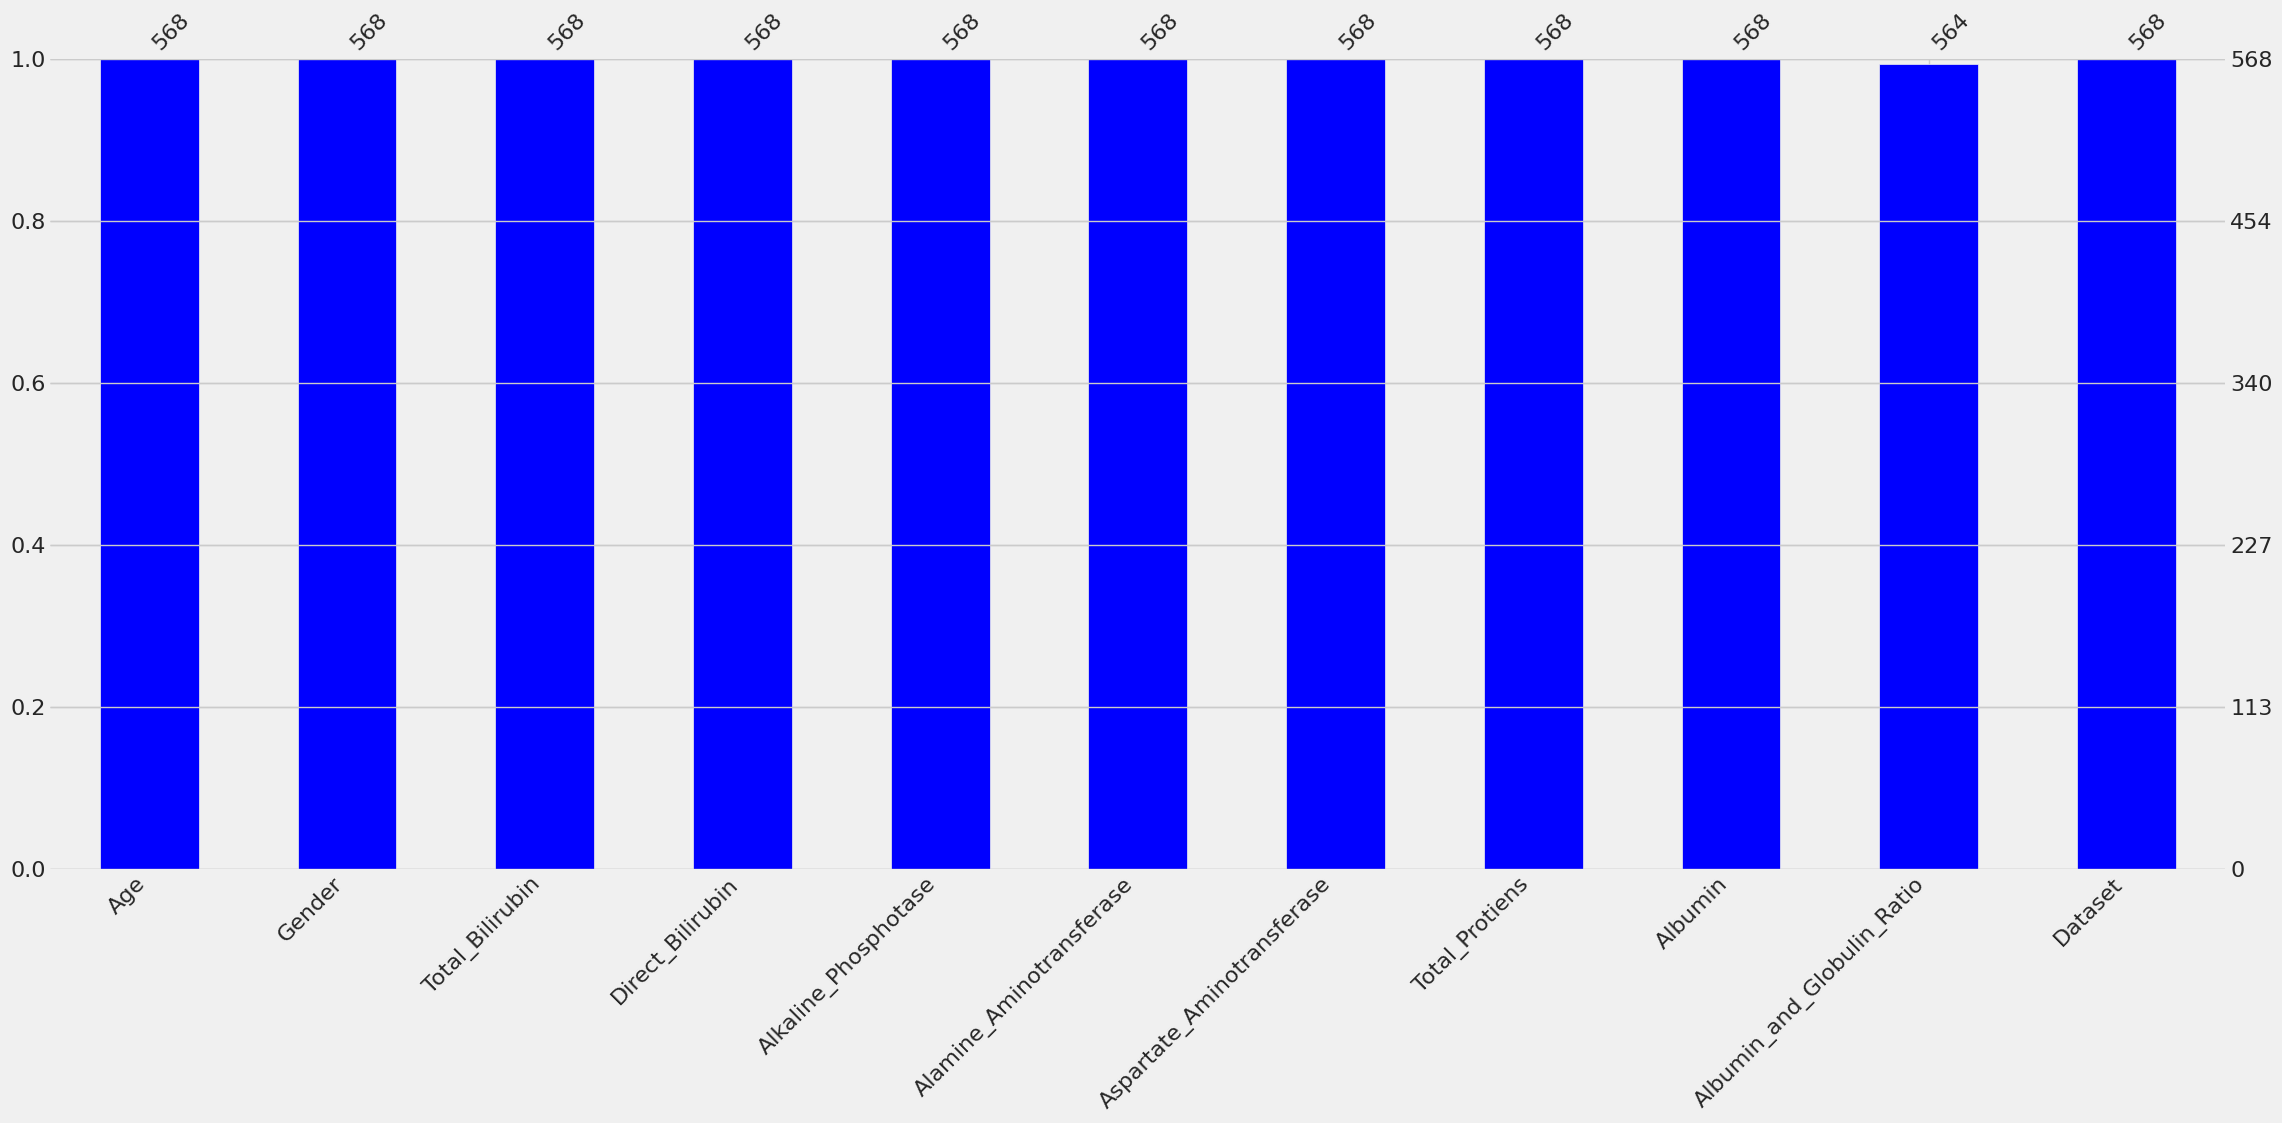

In [67]:
import missingno as msno
msno.bar(df, color = "blue")

In [68]:
df = df.dropna(how='any')

In [69]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Machine Learning Algorithms & Hyper Parameter Tuning

In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [71]:
X = df.drop(columns = ['Dataset'])
y = df['Dataset']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
train_mean = X_train.mean()
train_std = X_train.std()

In [74]:
X_train = (X_train - train_mean) / train_std

In [75]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,5.908060e-17,5.514190e-17,-1.403164e-17,6.055762e-17,-2.363224e-17,4.332578e-17,5.908060e-18,4.037175e-16,2.245063e-16,-1.260386e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.581522e+00,-5.775623e-01,-5.178870e-01,-5.003855e-01,-9.719302e-01,-3.985372e-01,-5.111449e-01,-3.406526e+00,-2.789176e+00,-2.042785e+00
25%,-7.545795e-01,-5.775623e-01,-4.402642e-01,-4.629168e-01,-4.650103e-01,-3.182602e-01,-4.213248e-01,-6.149757e-01,-6.750275e-01,-7.723822e-01
50%,1.396852e-03,-5.775623e-01,-4.014528e-01,-4.254481e-01,-3.332558e-01,-2.503335e-01,-3.315047e-01,1.054244e-01,-5.321908e-02,-1.371809e-01
75%,7.573732e-01,5.750067e-01,-1.200701e-01,-8.823001e-02,4.190951e-02,-8.669181e-02,-7.102628e-02,6.457245e-01,8.173127e-01,4.980203e-01
max,2.521318e+00,1.727576e+00,5.730750e+00,6.318914e+00,8.170492e+00,9.913975e+00,9.009789e+00,2.716875e+00,2.931461e+00,5.897231e+00


In [76]:
X_test = (X_test - train_mean) / train_std

In [77]:
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,-0.033168,-0.067576,0.231894,0.102429,0.237990,0.003886,0.028624,0.056016,0.023819,0.078956
std,1.123636,0.961081,1.842838,1.281817,1.379126,0.794066,1.159382,0.900660,0.956009,1.070829
min,-2.581522,-0.577562,-0.498481,-0.500385,-0.918335,-0.398537,-0.499169,-1.875676,-1.918644,-1.820464
25%,-0.817578,-0.577562,-0.440264,-0.462917,-0.480642,-0.305910,-0.415337,-0.524926,-0.675027,-0.772382
50%,-0.124599,-0.577562,-0.401453,-0.425448,-0.279661,-0.225633,-0.319529,0.105424,-0.053219,0.180420
75%,0.946367,-0.577562,0.006067,0.024176,0.229492,-0.089779,0.051728,0.645725,0.692951,0.815621
max,2.836308,1.727576,13.958768,6.843475,6.562641,5.406110,8.410988,2.806925,2.185291,4.944429


In [78]:
y_train.value_counts()

Dataset
1    321
0    130
Name: count, dtype: int64

# Handling Imbalanced Dataset with SMOTE Technique

In [79]:
smote = SMOTE(random_state = 42)

In [80]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [81]:
y_train_smote.value_counts()

Dataset
1    321
0    321
Name: count, dtype: int64

In [82]:
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [83]:
y_pred = lr.predict(X_test)

In [84]:
print(accuracy_score(y_train_smote, lr.predict(X_train_smote)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.7087227414330218
0.6991150442477876
[[29  3]
 [31 50]]
              precision    recall  f1-score   support

           0       0.48      0.91      0.63        32
           1       0.94      0.62      0.75        81

    accuracy                           0.70       113
   macro avg       0.71      0.76      0.69       113
weighted avg       0.81      0.70      0.71       113



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [86]:
knn.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0])

In [87]:
print(accuracy_score(y_train_smote, lr.predict(X_train_smote)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

0.7087227414330218
0.6371681415929203
[[21 11]
 [30 51]]
              precision    recall  f1-score   support

           0       0.41      0.66      0.51        32
           1       0.82      0.63      0.71        81

    accuracy                           0.64       113
   macro avg       0.62      0.64      0.61       113
weighted avg       0.71      0.64      0.65       113



In [88]:
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 5, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 5, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [89]:
grid_search.best_params_

{'C': 5, 'gamma': 0.1}

In [90]:
grid_search.best_score_

0.7290334302325581

In [91]:
svc= SVC(C=15, gamma=0.01,probability=True)
svc.fit(X_train_smote, y_train_smote)

SVC(C=15, gamma=0.01, probability=True)

In [92]:
print(accuracy_score(y_train_smote, svc.predict(X_train_smote)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test, svc.predict(X_test)))
print(classification_report(y_test, svc.predict(X_test)))

0.7258566978193146
0.6637168141592921
[[29  3]
 [35 46]]
              precision    recall  f1-score   support

           0       0.45      0.91      0.60        32
           1       0.94      0.57      0.71        81

    accuracy                           0.66       113
   macro avg       0.70      0.74      0.66       113
weighted avg       0.80      0.66      0.68       113



In [93]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [94]:
print(accuracy_score(y_train_smote, dtc.predict(X_train_smote)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

1.0
0.672566371681416
[[12 20]
 [17 64]]
              precision    recall  f1-score   support

           0       0.41      0.38      0.39        32
           1       0.76      0.79      0.78        81

    accuracy                           0.67       113
   macro avg       0.59      0.58      0.58       113
weighted avg       0.66      0.67      0.67       113



In [95]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,9,11,13],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=20, n_jobs=-1, verbose=1)
grid_seach_dt.fit(X_train_smote, y_train_smote)

Fitting 20 folds for each of 1800 candidates, totalling 36000 fits


GridSearchCV(cv=20, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [96]:
grid_seach_dt.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [97]:
grid_seach_dt.best_score_

0.7475852272727272

In [98]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, splitter='best')
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features='sqrt',
                       min_samples_leaf=2)

In [99]:
print(accuracy_score(y_train_smote, dtc.predict(X_train_smote)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

0.926791277258567
0.6637168141592921
[[19 13]
 [25 56]]
              precision    recall  f1-score   support

           0       0.43      0.59      0.50        32
           1       0.81      0.69      0.75        81

    accuracy                           0.66       113
   macro avg       0.62      0.64      0.62       113
weighted avg       0.70      0.66      0.68       113



In [100]:
rand_cls = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.75, min_samples_leaf=5, min_samples_split=3, n_estimators = 100)

In [101]:
rand_cls.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.75,
                       min_samples_leaf=5, min_samples_split=3)

In [102]:
print(accuracy_score(y_train_smote, rand_cls.predict(X_train_smote)))
rand_cls_acc = accuracy_score(y_test, rand_cls.predict(X_test))
print(rand_cls_acc)
print(confusion_matrix(y_test, rand_cls.predict(X_test)))
print(classification_report(y_test, rand_cls.predict(X_test)))

0.9299065420560748
0.7345132743362832
[[22 10]
 [20 61]]
              precision    recall  f1-score   support

           0       0.52      0.69      0.59        32
           1       0.86      0.75      0.80        81

    accuracy                           0.73       113
   macro avg       0.69      0.72      0.70       113
weighted avg       0.76      0.73      0.74       113



In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'n_estimators': [100, 120, 140, 160, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train_smote, y_train_smote)

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 120, 140, 160, 180]},
             verbose=1)

In [104]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 140}

In [105]:
grid_search_gbc.best_score_

0.7962594696969697

In [106]:
gbc = GradientBoostingClassifier(learning_rate=1, loss='exponential',n_estimators=120)
gbc.fit(X_train_smote , y_train_smote)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=120)

In [107]:
print(accuracy_score(y_train_smote, gbc.predict(X_train_smote)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
print(confusion_matrix(y_test, gbc.predict(X_test)))
print(classification_report(y_test, gbc.predict(X_test)))

1.0
0.7522123893805309
[[17 15]
 [13 68]]
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        32
           1       0.82      0.84      0.83        81

    accuracy                           0.75       113
   macro avg       0.69      0.69      0.69       113
weighted avg       0.75      0.75      0.75       113



In [108]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier(objective='binary:logistic', learning_rate = 0.001, max_depth = 100, n_estimators = 150)
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [110]:
print(accuracy_score(y_train_smote, xgb.predict(X_train_smote)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

0.9127725856697819
0.6637168141592921
[[15 17]
 [21 60]]
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        32
           1       0.78      0.74      0.76        81

    accuracy                           0.66       113
   macro avg       0.60      0.60      0.60       113
weighted avg       0.68      0.66      0.67       113



# Model Evaluation

In [111]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifer', 'XgBoost'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_cls_acc, 4), 100*round(gbc_acc, 4),100*round(xgb_acc, 4)]
})

In [112]:
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Gradient Boosting Classifer,75.22
4,Random Forest Classifier,73.45
0,Logistic Regreesion,69.91
2,SVC,66.37
3,Decision Tree Classifier,66.37
6,XgBoost,66.37
1,KNN,63.72


# Model Saving

In [113]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl","wb"))